In [2]:
import pandas as pd
import numpy as np
import math

### Now that we have added the climate data into sparse SkiResort dataset we need to combine it with the udpated csv that I've been wokring on adding data into 

In [3]:
df1 = pd.read_excel('SkiResort_update_v02.xlsx',header=0)

# get rid of rows without information on adult fares
df1 = df1.dropna(subset=['adult day pass'])
df1.describe()

,annualSnowfall,lat,long,openingYear,runCount,liftCount,longestRun,hourlyLiftCapacity,adult day pass,drop (m),summit (m)
count,35.000000,222.000000,222.000000,51.000000,189.000000,177.000000,73.000000,53.000000,222.000000,107.000000,87.000000
mean,758.248571,46.322374,-92.787016,1959.705882,43.513228,6.576271,3606.570028,12498.283019,49.215202,470.588617,1446.805747
std,337.962429,3.855264,20.059230,14.854352,42.591155,5.368903,3097.370681,11809.069341,30.918016,375.013268,958.697290
min,137.000000,35.701429,-128.953571,1933.000000,2.000000,0.000000,183.000000,30.000000,0.000000,30.000000,137.000000
25%,550.000000,43.986360,-113.536332,1951.500000,16.000000,3.000000,1590.000000,4500.000000,30.400000,209.000000,569.500000
50%,762.000000,45.919379,-88.252432,1962.000000,27.000000,5.000000,2800.000000,8260.000000,44.080000,390.000000,1245.000000
75%,978.500000,49.107150,-74.244644,1965.500000,52.000000,8.000000,5000.000000,15800.000000,67.230000,664.000000,2301.500000
max,1638.000000,55.868826,-54.046468,2018.000000,300.000000,38.000000,16415.308275,61407.000000,169.000000,2612.000000,3374.000000


In [4]:
df2 = pd.read_csv('temp_200.csv')
df2.head()

,annualSnowfall,created,georeferencing,hourlyLiftCapacity,lat,liftCount,long,longestRun,name,nightSkiing,...,1889_COLD,1887_COLD,1886_HOT,1885_HOT,1884_HOT,1883_HOT,1884_COLD,1885_COLD,1886_COLD,1883_COLD
0,NaN,2016-02-18T14:11:51+00:00,NaN,NaN,52.977947,NaN,-66.920940,NaN,Smokey Mountain Ski Club,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2018-01-01T20:31:10+00:00,NaN,NaN,53.523580,NaN,-64.020094,NaN,Northern Lights Ski Club,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2008-04-13T00:11:59+00:00,NaN,NaN,48.161777,NaN,-54.046468,NaN,White Hills,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2018-06-30T20:17:04+00:00,NaN,NaN,53.409742,2.0,-60.425457,NaN,Snow Goose Mountain (Mont Shana),Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2008-04-13T00:11:59+00:00,NaN,NaN,48.936667,NaN,-57.827222,NaN,Marble Mountain,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
result = pd.merge(df1,df2,how='left',on=['name','name'])

In [88]:
result.to_csv('SkiResort_Combined_test.csv',index=False)

In [6]:
import matplotlib.pyplot as plt
plt.plot(result['adult day pass'],result['2010_COLD'],'o')
plt.plot(result['adult day pass'],result['2010_HOT'],'o')
plt.xlabel('Cost')
plt.ylabel('Days')

Text(0, 0.5, 'Days')

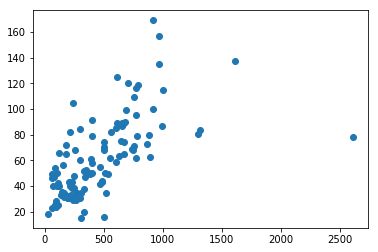

In [7]:
plt.plot(result['drop (m)'],result['adult day pass'],'o')

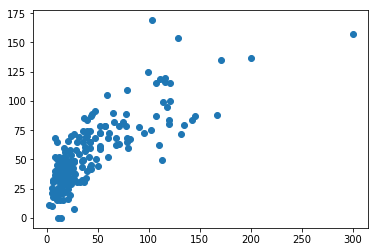

In [8]:
plt.plot(result['runCount_x'],result['adult day pass'],'o')

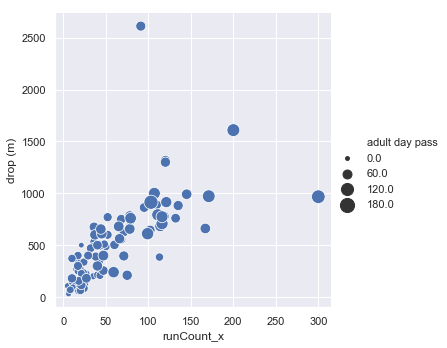

In [9]:
import seaborn as sns
sns.set(style="darkgrid")
sns.relplot(x="runCount_x", y="drop (m)", size="adult day pass",sizes=(15,200), data=result);


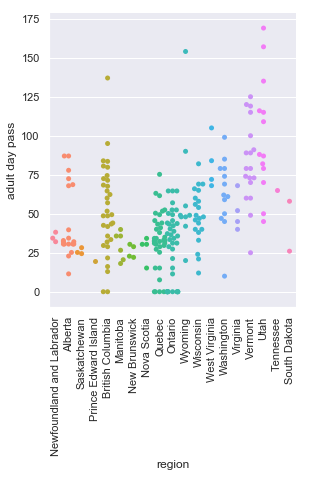

In [10]:
g = sns.catplot(x="region", y="adult day pass", kind="swarm", data=result);
g.set_xticklabels(rotation=90)


### Figure out how to make a column of the ratio of cold days to total observations


In [11]:
temp = list(result)
cold_cols = [col for col in result.columns if '_COLD' in col]
result['AVG_COLDDAYS'] = result[cold_cols].sum(axis=1)/result['NYEAR']
# result['COLD_DAYS'] =  

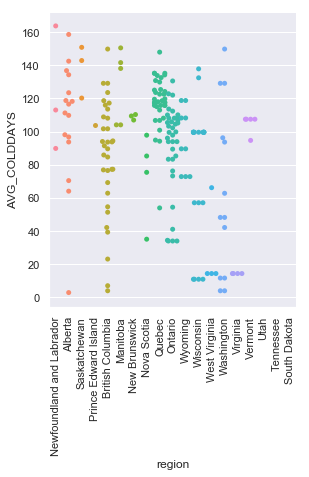

In [12]:
g = sns.catplot(x="region", y="AVG_COLDDAYS", kind="swarm", data=result);
g.set_xticklabels(rotation=90)

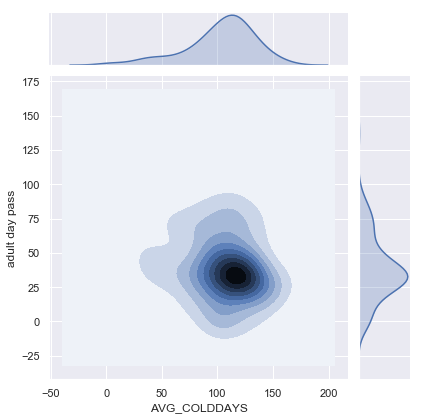

In [42]:
sns.jointplot(x="AVG_COLDDAYS", y="adult day pass", data=result, kind="kde");

In [22]:
temp = result[list(result)[2:18]]
temp = temp.drop(['openingYear_x','hourlyLiftCapacity_x'],axis=1)

/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


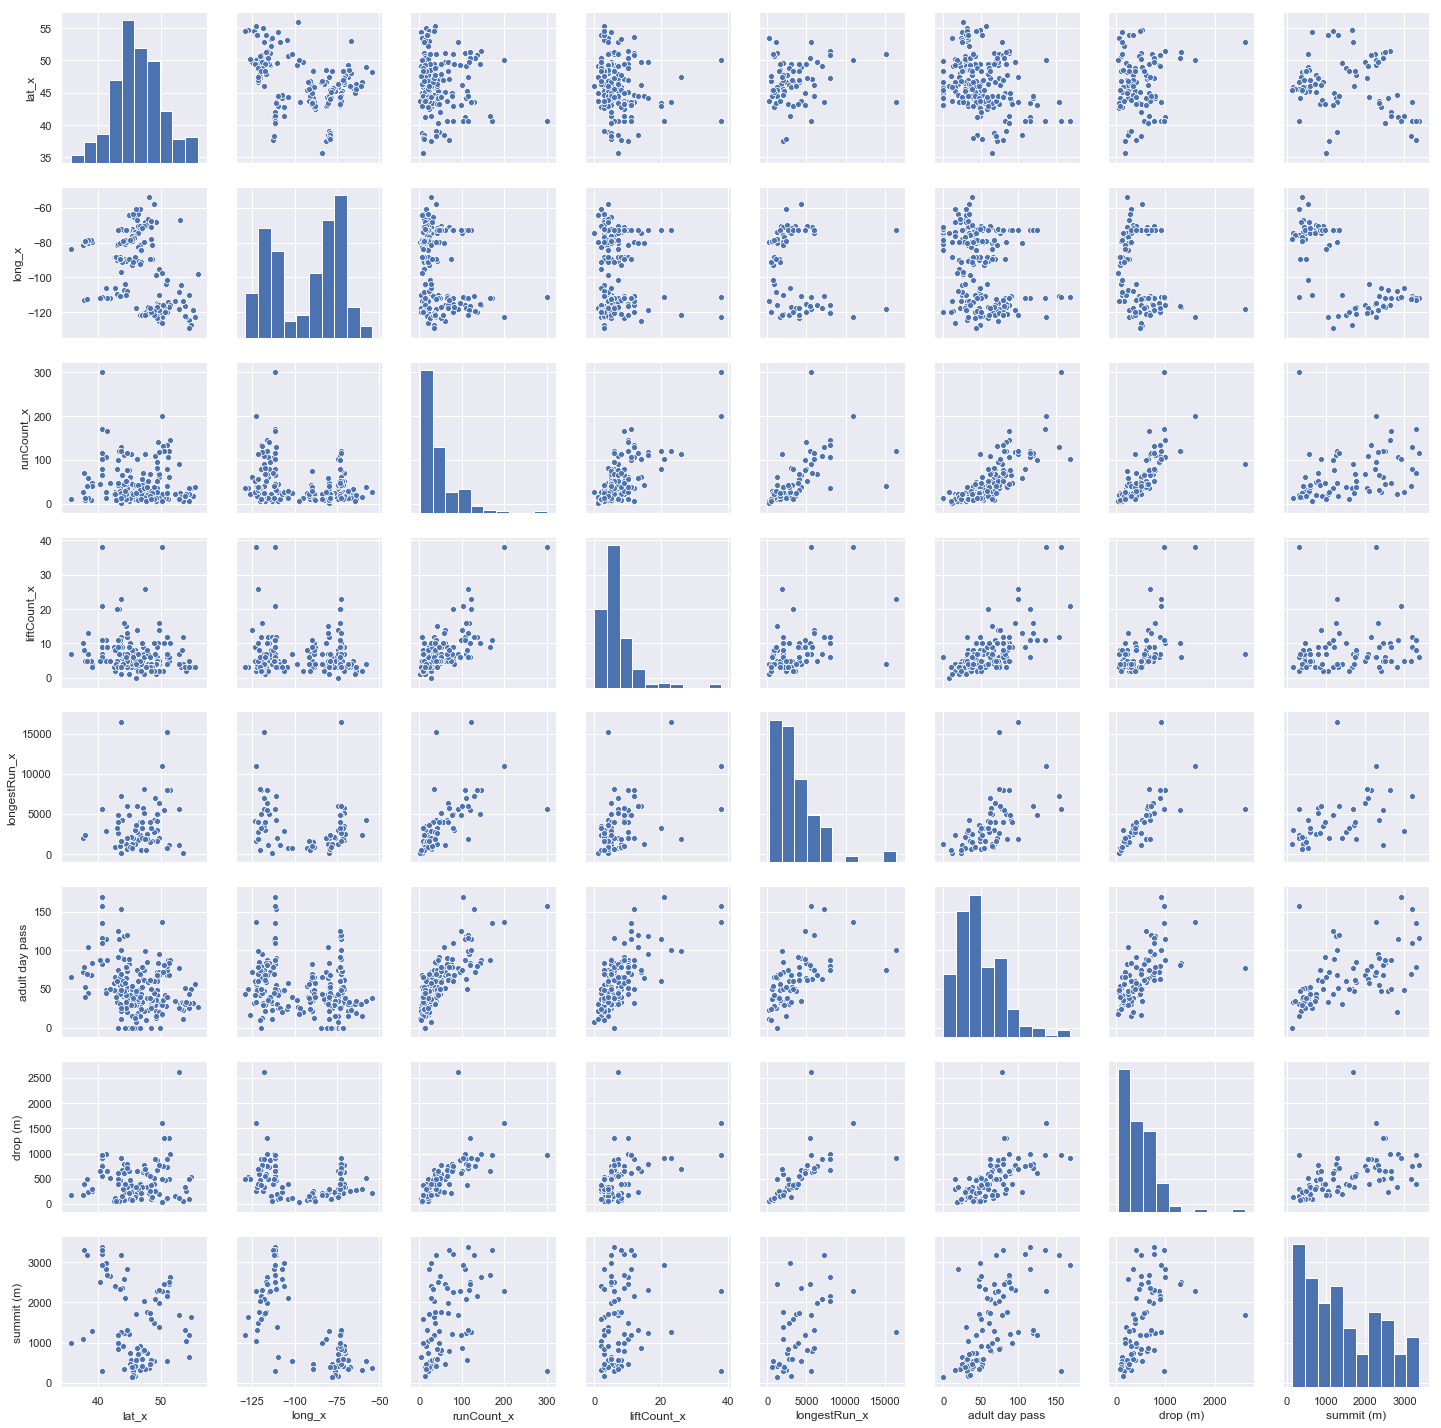

In [23]:
sns.pairplot(temp)

In [55]:

#Import Library
import folium
import pandas as pd
import branca

#Load Data
lat = result['lat_x']
lon = result['long_x']
rate = result['adult day pass']

#Function to change colors
def color_change(elev):
    if(rate < 35):
        return('green')
    elif(35 <= rate <70):
        return('orange')
    else:
        return('red')

#Create base map
map = folium.Map(location=[37.296933,-121.9574983], zoom_start = 5, tiles = "CartoDB dark_matter")

#Plot Markers
for lat, lon, rate in zip(lat, lon, rate):
    folium.CircleMarker(location=[lat, lon], radius = 9, popup=str(rate)+" m", fill_color=color_change(rate), color="gray", fill_opacity = 0.9).add_to(map)
#Save the map
map.save("map1.html")

## Cluster the Markers

In [54]:
from folium.plugins import MarkerCluster

#Load Data
lat = result['lat_x']
lon = result['long_x']
rate = result['adult day pass']
name = result['name']
#Create base map
map = folium.Map(location=[37.296933,-121.9574983], zoom_start = 5, tiles = "CartoDB dark_matter")


#Create Cluster
marker_cluster = MarkerCluster().add_to(map)

html="""
    <h1> This is a big popup</h1><br>
    With a few lines of code...
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframe = folium.element.IFrame(html=html, width=500, height=300)
popup = folium.Popup(iframe, max_width=2650)

#Plot Markers and add to 'marker_cluster'
for lat, lon, rate,name in zip(lat, lon, rate,name):
#     label = 'Name: {0:s} <br> Lift Ticket: {1:.2f}'.format(name,rate)
    label = "Name: {0:s}".format(name)
    print(label)
    folium.CircleMarker(location=[lat, lon], radius = 9, popup=label, fill_color=color_change(rate), color="gray", fill_opacity = 0.9).add_to(marker_cluster)
#Save the map
# map.save("map1.html")
map

AttributeError: module 'folium' has no attribute 'element'

In [84]:
def fancy_html(row):
    
    Region = row['region']
    Date=row['name']
    NRuns=row['runCount_x']
    if math.isnan(NRuns):
        NRuns = 'Unknown'
    else:
        NRuns = str(int(NRuns))
#     Number_of_Casualties = row['Number_of_Casualties'].iloc[i]                           
#     Date = row['created_x']
#     Time = row['NYEAR']                                    
#     Light_Conditions = df['Light_Conditions'].iloc[i]                               
#     Weather_Conditions = df['Weather_Conditions'].iloc[i]      
#     Road_Surface_Conditions = df['Road_Surface_Conditions'].iloc[i]
    
    left_col_colour = "#2A799C"
    right_col_colour = "#C5DCE7"
    
    html = """<!DOCTYPE html>
<html>

<head>
<h4 style="margin-bottom:0"; width="300px">{}{}</h4>""".format(Date,", " + Region) + """

</head>
    <table style="height: 126px; width: 300px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Region</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Region) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">No. Runs</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(NRuns) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [89]:
# m = folium.Map(location=[37.296933,-121.9574983], zoom_start = 5, tiles = "CartoDB dark_matter")
m = folium.Map(location=[37.296933,-121.9574983], zoom_start = 5, tiles = "Mapbox Bright")

m = folium.Map(location=[37.296933,-121.9574983], zoom_start = 5, tiles = "cartodbpositron")

for index, row in result.iterrows():
    html = fancy_html(row)
 
    iframe = branca.element.IFrame(html=html,width=400,height=300)
    popup = folium.Popup(iframe,parse_html=True)
    
    folium.Marker([row['lat_x'],row['long_x']],
                  popup=popup,icon=folium.Icon(color='red', icon='info-sign')).add_to(m)

m.save("map1.html")


In [83]:
import math
NRuns=result['runCount_x'].iloc[0]
math.isnan(NRuns)

False